### Práctica ANN-0:

Modifique el código anterior, a fin de usar [Hot Encoding](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science) y contar con 2 salidas en lugar de 1.

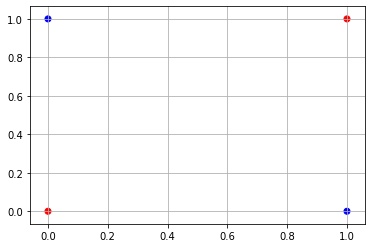

In [1]:
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

x=np.array([[0,0],[0,1],[1,0],[1,1]])
d=np.array([[0,1],[1,0],[1,0],[0,1]])

pp.scatter(x[:,0],x[:,1],color=['blue' if i==1 else 'red' for i in d[:,0]])

pp.grid(True)
pp.show()

Press `c` to save figure to "_feed_forward.png", `Ctrl+d` to break >>
> c:\users\katherine\anaconda3\envs\ia2\lib\site-packages\viznet\context.py(61)__exit__()
-> plt.savefig(self.filename, dpi=300, transparent=True)
(Pdb) c


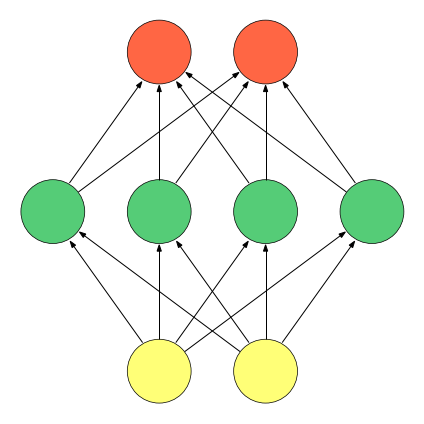

In [2]:
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow

# Creamos variables con los parametros que tendra la red
entradas = 2
neuronas_capa_oculta = 4
neuronas_capa_salida = 2


def dibujar_red_neuronal(ax, num_node_list):

    num_hidden_layer = len(num_node_list) - 2
    token_list = ['\sigma^z'] + \
        ['y^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.hidden'] * num_hidden_layer + ['nn.output']
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    y_list = 1.5 * np.arange(len(num_node_list))

    seq_list = []
    for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
        b = NodeBrush(kind, ax)
        seq_list.append(node_sequence(b, n, center=(0, y)))

    eb = EdgeBrush('-->', ax)
    for st, et in zip(seq_list[:-1], seq_list[1:]):
        connecta2a(st, et, eb)


def real_bp():
    with DynamicShow((6, 6), '_feed_forward.png') as d:
        dibujar_red_neuronal(d.ax, num_node_list=[entradas, neuronas_capa_oculta, neuronas_capa_salida])


real_bp()

In [3]:
# Importamos el Perceptron Multicapa para Clasificacion
from sklearn.neural_network import MLPClassifier

# Creamos la red neuronal
mlp=MLPClassifier(solver = 'lbfgs', activation='logistic', verbose=True, alpha=1e-4, tol=1e-15, max_iter=10000, \
                  hidden_layer_sizes=(neuronas_capa_oculta, neuronas_capa_salida))

print(mlp)
# Realizamos el proceso de entrenamiento
mlp.fit(x,d)

# Mostramos los pesos entre la entrada y la capa oculta
print('Pesos W^(0): \n:',mlp.coefs_[0])

# Mostramos los pesos entre la capa oculta y la capa de salida
print('\nPesos W^(1): \n:',mlp.coefs_[1])

# Probamos si la red devuelve valores apropiados de acuerdo a las entradas (test):
for entrada in x:
    print('\nPrueba con {','|'.join([str(i) for i in entrada]),'} => ',mlp.predict(entrada.reshape(1,-1)))

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=1e-15,
              validation_fraction=0.1, verbose=True, warm_start=False)
Pesos W^(0): 
: [[-4.28276975  0.00791504  3.26471035  3.15977366]
 [ 4.28418934 -0.00538996 -3.267845   -3.15665779]]

Pesos W^(1): 
: [[-8.75241459e-01 -8.65574850e+00]
 [ 3.73112323e-03  1.46715004e-02]
 [ 6.22200003e+00  2.15445909e+00]
 [ 6.01672370e+00  2.36391204e+00]]

Prueba con { 0|0 } =>  [[0 1]]

Prueba con { 0|1 } =>  [[1 0]]

Prueba con { 1|0 } =>  [[1 0]]

Prueba con { 1|1 } =>  [[0 1]]


### Práctica ANN-1:

Genere 1000 puntos aleatorios con coordenadas $(x_{1}, x_{2})$. Con estos puntos, deberá realizar las siguientes tareas:

* Seleccionar de forma aleatoria 80% de los puntos para entrenar la red y el restante 20% se empleará para probar la red.
* Entrenar la red hasta lograr un error mínimo.
* Probar la red y presentar la matriz de [confusión](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).
* Indicar el nivel de [precisión](https://en.wikipedia.org/wiki/Precision_and_recall) (muestras correctamente clasificadas frente al total de muestras):

$precision=\frac{muestras ~~correctamente ~~clasificadas}{total~~ de~~ muestras}$

Train: 0.826, Test: 0.845


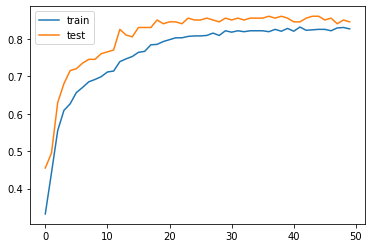

In [7]:
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = int(0.8 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=50, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# learning curves of model accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()